In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_sample_weight

# Assuming TensorFlow 2.x
from tensorflow.keras import layers, models

# Load and preprocess the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # using 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pbl dataset small/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pbl dataset small/val',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Manually compute class weights
labels = train_generator.classes
class_weights = compute_sample_weight(
    class_weight='balanced',
    y=labels
)
unique_classes = np.unique(labels)
class_weights_dict = {class_label: np.mean(class_weights[labels == class_label]) for class_label in unique_classes}

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weights_dict
)

# Save the model
model.save('mynew_model.h5')


Found 558 images belonging to 9 classes.
Found 36 images belonging to 9 classes.
Epoch 1/50
17/17 [==============================] - 226s 14s/step - loss: 2.7499 - accuracy: 0.1635 - val_loss: 2.1180 - val_accuracy: 0.1562
Epoch 2/50
17/17 [==============================] - 66s 4s/step - loss: 1.9848 - accuracy: 0.2700 - val_loss: 2.1374 - val_accuracy: 0.1562
Epoch 3/50
17/17 [==============================] - 65s 4s/step - loss: 1.8909 - accuracy: 0.2871 - val_loss: 1.8429 - val_accuracy: 0.2188
Epoch 4/50
17/17 [==============================] - 76s 4s/step - loss: 1.6820 - accuracy: 0.3650 - val_loss: 1.5931 - val_accuracy: 0.3750
Epoch 5/50
17/17 [==============================] - 67s 4s/step - loss: 1.5069 - accuracy: 0.4202 - val_loss: 1.5476 - val_accuracy: 0.5000
Epoch 6/50
17/17 [==============================] - 70s 4s/step - loss: 1.4826 - accuracy: 0.4354 - val_loss: 1.6506 - val_accuracy: 0.5312
Epoch 7/50
17/17 [==============================] - 67s 4s/step - loss: 1.362

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Train the model and save the history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weights_dict
)


Epoch 1/50
17/17 [==============================] - 71s 4s/step - loss: 0.4643 - accuracy: 0.8384 - val_loss: 1.9453 - val_accuracy: 0.5312
Epoch 2/50
17/17 [==============================] - 68s 4s/step - loss: 0.3757 - accuracy: 0.8479 - val_loss: 2.0516 - val_accuracy: 0.5938
Epoch 3/50
17/17 [==============================] - 69s 4s/step - loss: 0.5640 - accuracy: 0.8061 - val_loss: 1.4360 - val_accuracy: 0.6250
Epoch 4/50
17/17 [==============================] - 66s 4s/step - loss: 0.6693 - accuracy: 0.7643 - val_loss: 1.5338 - val_accuracy: 0.5938
Epoch 5/50
17/17 [==============================] - 68s 4s/step - loss: 0.5494 - accuracy: 0.7928 - val_loss: 1.3778 - val_accuracy: 0.5938
Epoch 6/50
17/17 [==============================] - 66s 4s/step - loss: 0.4946 - accuracy: 0.8061 - val_loss: 1.6677 - val_accuracy: 0.5312
Epoch 7/50
17/17 [==============================] - 69s 4s/step - loss: 0.3657 - accuracy: 0.8688 - val_loss: 1.2456 - val_accuracy: 0.5938
Epoch 8/50
17/17 [==

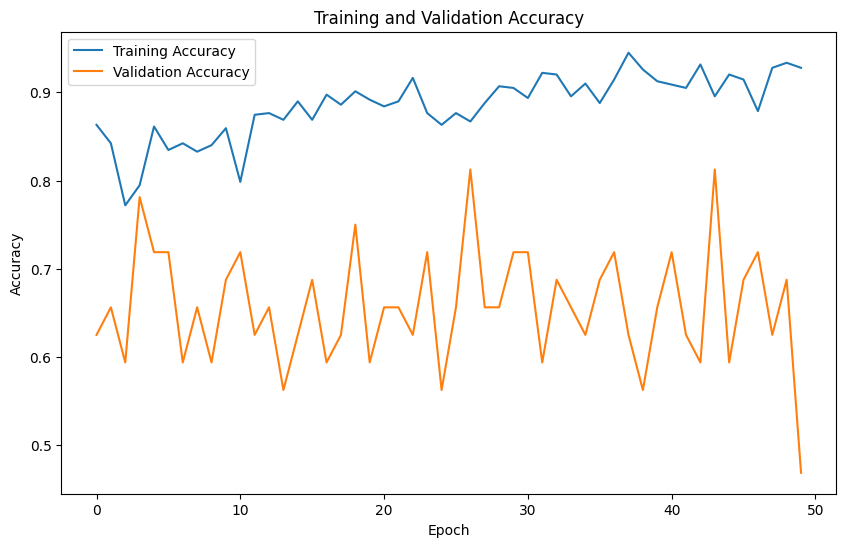

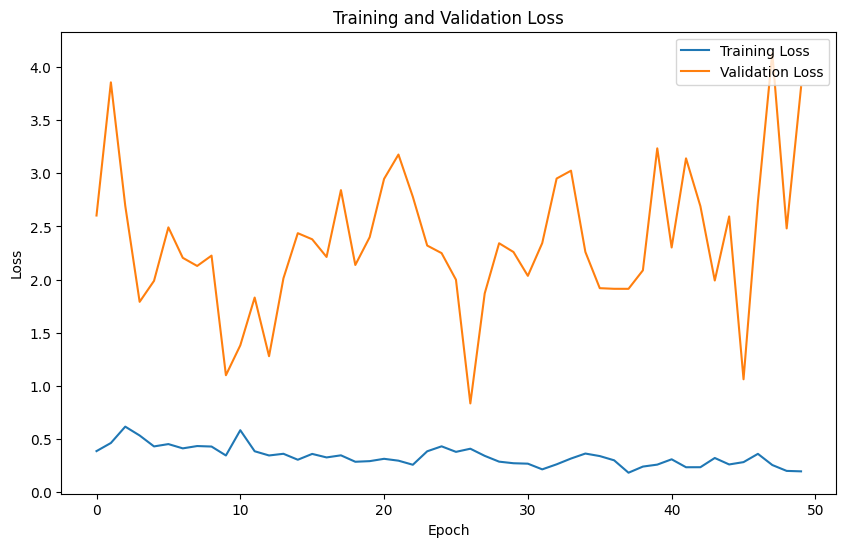

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
from google.colab import files


# For H5 format
files.download('mynew_model.h5')


In [ ]:
model_save_path = "/content/drive/MyDrive/Colab Notebooks/mynew_model.h5"
model.save(model_save_path)

In [ ]:
from tensorflow.keras.models import load_model

# Load the refined model
model = load_model('mynew_model.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test',  # Update this path to your test data
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',  # or 'binary' for binary classification
    shuffle=False  # Important for correct label matching
)


Found 112 images belonging to 9 classes.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict the class probabilities or class indices
predictions = model.predict(test_generator, steps=np.ceil(test_generator.samples / test_generator.batch_size))

# Convert probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Retrieve true class indices
true_classes = test_generator.classes

# Retrieve the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate and print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Generate and print confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)


4/4 [==============================] - 24s 7s/step
                            precision    recall  f1-score   support

         Actinic keratosis       0.25      0.22      0.24         9
         Atopic Dermatitis       0.83      0.91      0.87        11
          Benign keratosis       0.87      1.00      0.93        13
            Dermatofibroma       0.36      0.69      0.47        13
         Melanocytic nevus       0.69      0.85      0.76        13
                  Melanoma       0.50      0.33      0.40        15
   Squamous cell carcinoma       0.43      0.21      0.29        14
Tinea Ringworm Candidiasis       0.83      0.71      0.77        14
           Vascular lesion       1.00      0.70      0.82        10

                  accuracy                           0.62       112
                 macro avg       0.64      0.63      0.62       112
              weighted avg       0.64      0.62      0.61       112

[[ 2  0  0  5  0  0  1  1  0]
 [ 0 10  0  0  0  0  0  1  0]
 [

In [ ]:
# Load the best model
model = tf.keras.models.load_model('mynew_model.h5')

# If you have a separate test set, set it up similar to train_generator
# For demonstration, we use validation_generator to simulate test evaluation

predictions = model.predict(validation_generator, steps=np.ceil(validation_generator.samples / validation_generator.batch_size))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
true_class_labels = list(validation_generator.class_indices.keys())  # Getting the class labels from the generator

# Trim true_classes to match predicted_classes' length if necessary
true_classes = true_classes[:len(predicted_classes)]

print(classification_report(true_classes, predicted_classes, target_names=true_class_labels))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('mynew_model.h5')

# Define your class labels (update this list based on your labels)
class_labels = [ 'Actinic Keratosis', 'Actinic Keratosis','Atopic Dermatitis','Benign Keratosis','Dermatofibroma','Melanocytic nevus','Melanoma','Squamous cell carcinoma','Tinea Ringworm Candidiasis','Vascular lesion',]  # Update this with your actual class labels

# Function to preprocess the image
def preprocess_image(image_path, target_size=(200, 200)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims / 255.0, img

# Function to predict the class of an image and display the image with the predicted label
def predict_and_display_image(image_path):
    preprocessed_image, original_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_class_label = class_labels[predicted_class]

    # Display the image
    plt.imshow(original_img)
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage - Update the path to the image you want to classify
image_path = '/content/drive/MyDrive/test/Atopic Dermatitis/1_26.jpg'
predict_and_display_image(image_path)


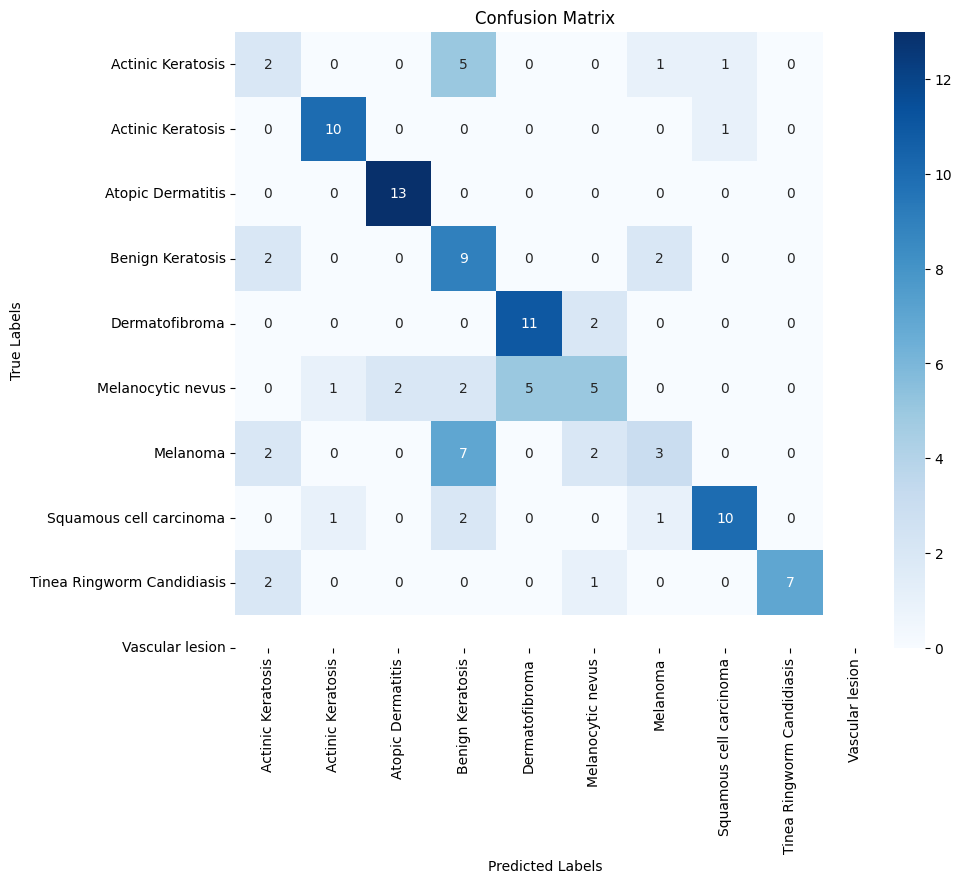

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
model = load_model('mynew_model.h5')

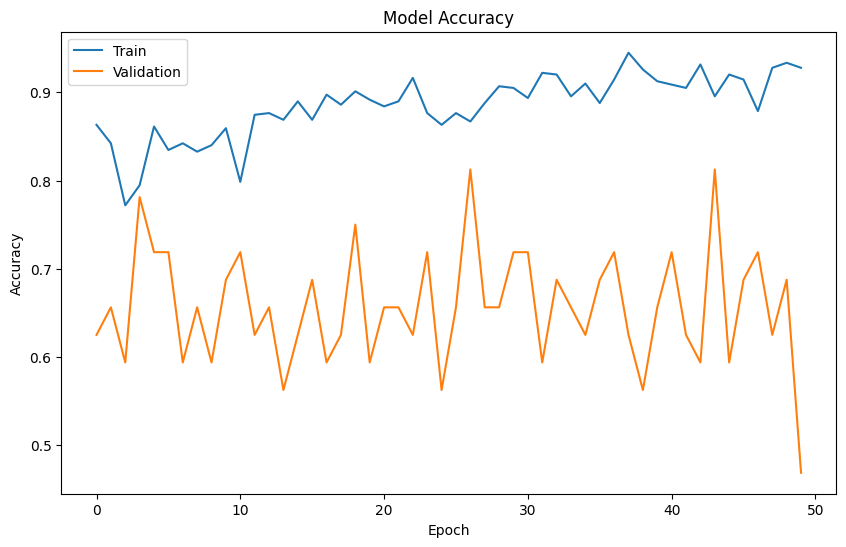

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

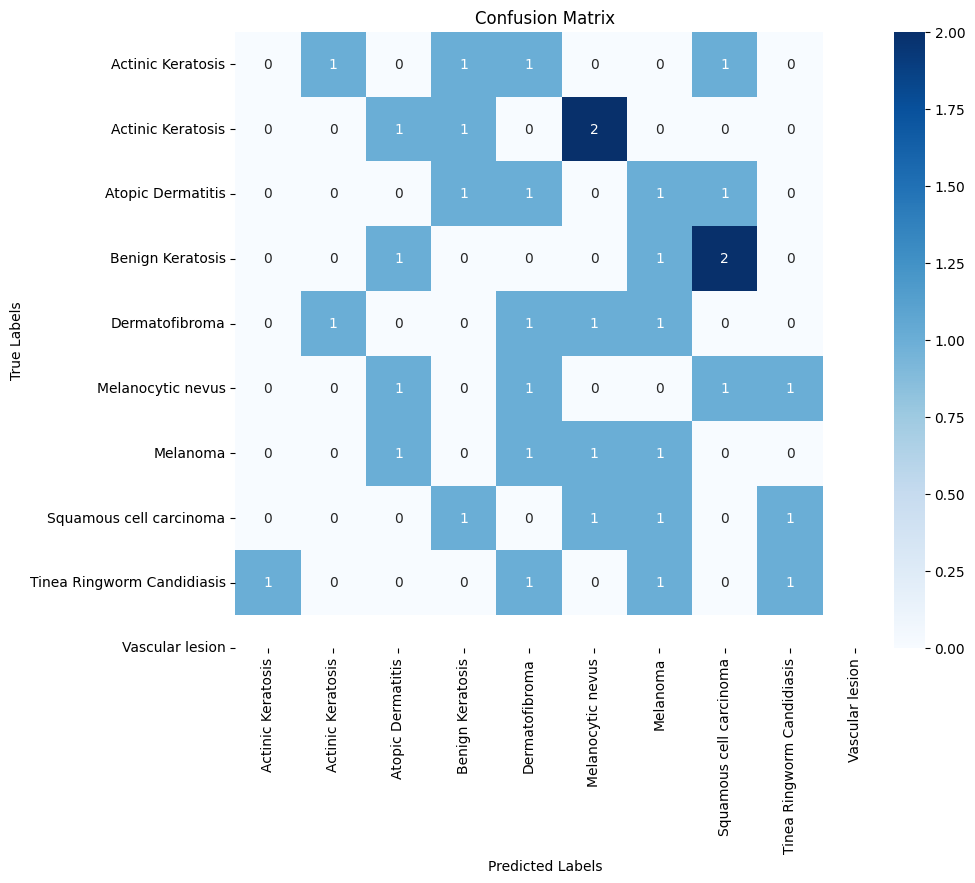

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'true_classes' and 'predicted_classes' are your true and predicted labels
conf_mat = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with true and predicted classes
df_comparison = pd.DataFrame({'True Labels': true_classes, 'Predicted Labels': predicted_classes})

# Optionally, map the numeric labels back to class names if you have them in 'class_labels'
df_comparison['True Labels'] = df_comparison['True Labels'].apply(lambda x: class_labels[x])
df_comparison['Predicted Labels'] = df_comparison['Predicted Labels'].apply(lambda x: class_labels[x])

print(df_comparison.head(20))  # Print the first 20 comparisons
